# Import resources

In [ ]:
!pip install deap
!pip install pygad

In [ ]:
import numpy as np
import pandas as pd
import cvxpy as cp
import matplotlib.pyplot as plt
from deap import base, creator, tools, algorithms
import pygad

# Preparation Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
def data_top(path, n):
  df_all = pd.read_csv(path)
  df_sorted = df_all.sort_values(by='Liquidity', ascending=False)
  top_rows = df_sorted.head(n)
  return top_rows

In [ ]:
def df2nparray(df):
  Symbol = df['Symbol'].to_numpy()
  P = df['Lastest Price'].to_numpy()
  ER = df['Expected Return'].to_numpy()
  R = df['Risk'].to_numpy()
  L = df['Liquidity'].to_numpy()
  return Symbol, P, ER, R, L

# GA Functions

In [ ]:
def fitness(ga_instance, solution, solution_idx):
  budget = 1000000

  # budget constraint
  if np.sum(solution*P*10) > budget:
    return 0

  # risk constraint
  if np.sum(solution*P*10*R) > budget*0.3 :
    return 0

  # diversity constraint
  for i in range(len(P)):
    if solution[i]*P[i]*10/budget >= 0.7:
      return 0

  fitness = np.sum(solution*P*ER*10)

  return fitness

In [ ]:
def ga_solve(param_list):
  # GA parameters
  num_gen = param_list[0]
  num_pop = param_list[1]
  num_x = param_list[2]
  low_bound = param_list[3]
  high_bound = param_list[4]
  elite = param_list[5]
  keep_par = param_list[6]
  mutation = param_list[7]
  pselect_type = param_list[8]
  x_type = param_list[9]
  k_tour = param_list[10]

  # PyGAD instance
  ga_instance = pygad.GA(num_generations = num_gen,
                        sol_per_pop = num_pop,
                        num_parents_mating = num_x,
                        fitness_func = fitness,
                        gene_type = int,
                        num_genes = len(Symbol),
                        init_range_low = low_bound,
                        init_range_high = high_bound,
                        keep_elitism = elite,
                        keep_parents = keep_par,
                        mutation_probability = mutation,
                        parent_selection_type = pselect_type,
                        crossover_type = x_type,
                        K_tournament = k_tour)

  # Run instance
  ga_instance.run()

  # Result from GA
  ga_instance.plot_fitness()
  best_solution, best_fitness, solution_idx = ga_instance.best_solution() #best solution in last population
  # print("Best Solution: ", best_solution)

  return best_solution, best_fitness

# Main Functions

In [ ]:
def main_opt(path, n, param_list):
  df = data_top(path, n)
  global Symbol, P, ER, R, L  #define as global variables
  Symbol, P, ER, R, L = df2nparray(df)

  best_solution, best_fitness = ga_solve(param_list)

  # Result: Symbol and Number of shares to invest
  result_col = ['Symbol', 'Price', 'NumberShares', 'Expected Return', 'Risk']
  result_df = pd.DataFrame(columns=result_col)
  for i in range(len(Symbol)):
    if best_solution[i] > 0:
      new_data = pd.DataFrame([[Symbol[i], P[i], best_solution[i]*10, ER[i], R[i]]], columns=result_col)
      result_df = pd.concat([result_df, new_data], ignore_index=True)

  print(best_fitness)
  print(result_df)

  return result_df, best_fitness

  # return best_fitness

In [ ]:
def main(prob_size, rep, num_gen, num_pop, x_rate, high_bound, elite_rate, mutation_rate, pselect_type, x_type, k_tour):
  path = '/content/drive/MyDrive/Symbols24.csv'
  low_bound = 0
  keep_par = 0
  num_x = round(num_pop*x_rate)
  num_elite = round(num_pop*elite_rate)
  param_list = [num_gen, num_pop, num_x, low_bound, high_bound, num_elite, keep_par, mutation_rate, pselect_type, x_type, k_tour]

  if prob_size == 'S':
    print("Small Problem with 12 considered symbols")
    bf_list = []
    for i in range(rep):
      result_df, best_fitness = main_opt(path, 12, param_list)
      bf_list.append(best_fitness)
      # print(result_df)
    # print(bf_list)

  if prob_size == 'L':
    print("Large Problem with 24 considered symbols")
    bf_list = []
    for i in range(rep):
      result_df, best_fitness = main_opt(path, 24, param_list)
      bf_list.append(best_fitness)
      # print(result_df)
    # print(bf_list_l)

  return bf_list

# Run

## Small problem

Small Problem with 12 considered symbols


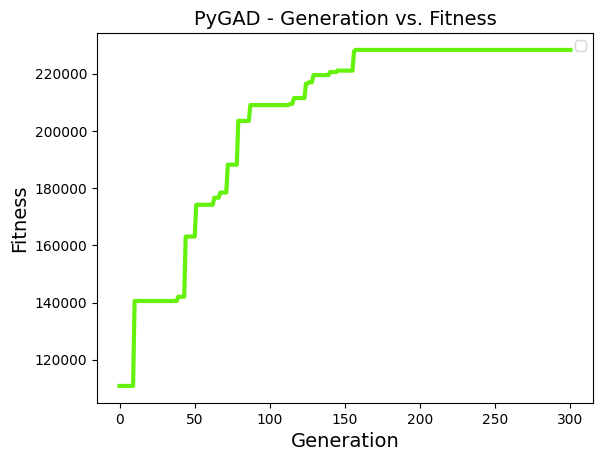

228336.78165216482
       Symbol    Price NumberShares  Expected Return      Risk
0  BAJFINANCE  5451.90           90         0.274964  0.491936
1  ULTRACEMCO  6278.95           80         0.185083  0.085346
2   POWERGRID   220.05           30         0.068145  0.012271


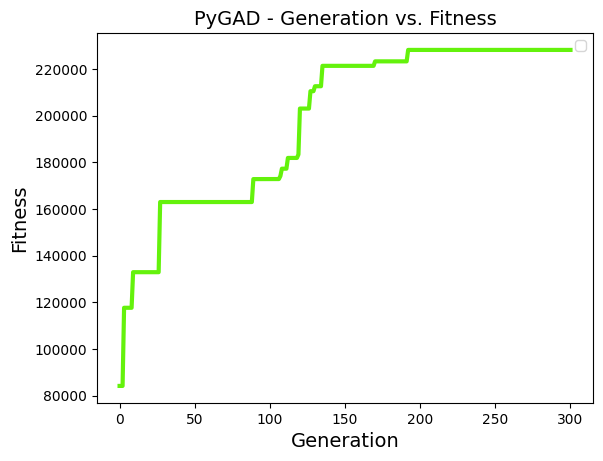

228186.82895459008
       Symbol    Price NumberShares  Expected Return      Risk
0  BAJFINANCE  5451.90           90         0.274964  0.491936
1  ULTRACEMCO  6278.95           80         0.185083  0.085346
2   POWERGRID   220.05           20         0.068145  0.012271


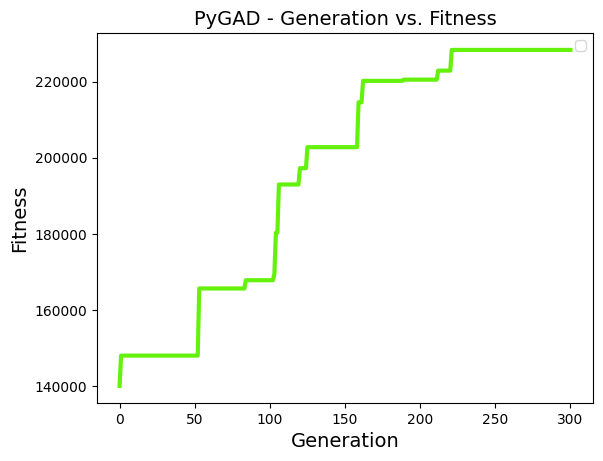

228336.78165216482
       Symbol    Price NumberShares  Expected Return      Risk
0  BAJFINANCE  5451.90           90         0.274964  0.491936
1  ULTRACEMCO  6278.95           80         0.185083  0.085346
2   POWERGRID   220.05           30         0.068145  0.012271


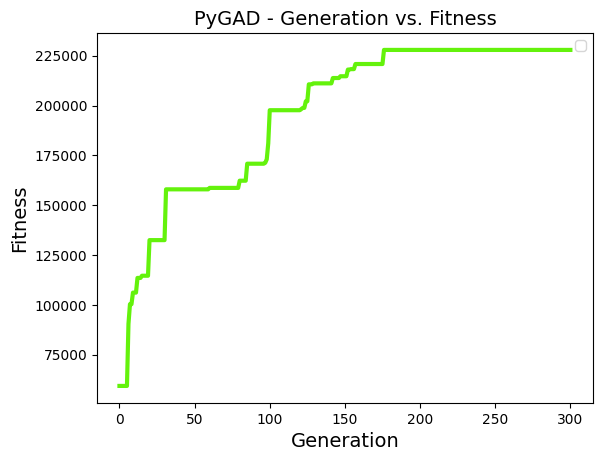

227929.2234863918
       Symbol    Price NumberShares  Expected Return      Risk
0  BAJFINANCE  5451.90           90         0.274964  0.491936
1  ULTRACEMCO  6278.95           80         0.185083  0.085346
2   POWERGRID   220.05           10         0.068145  0.012271
3         ITC   202.60           10        -0.053136  0.065926


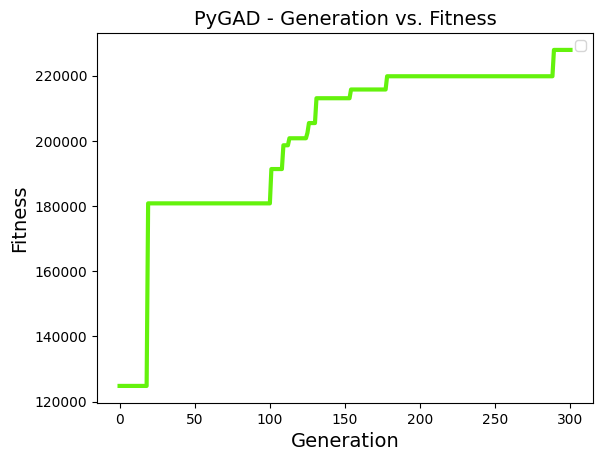

227910.95899687428
       Symbol    Price NumberShares  Expected Return      Risk
0  BAJFINANCE  5451.90           90         0.274964  0.491936
1  ULTRACEMCO  6278.95           80         0.185083  0.085346
2        NTPC   102.45           10         0.023461  0.029169


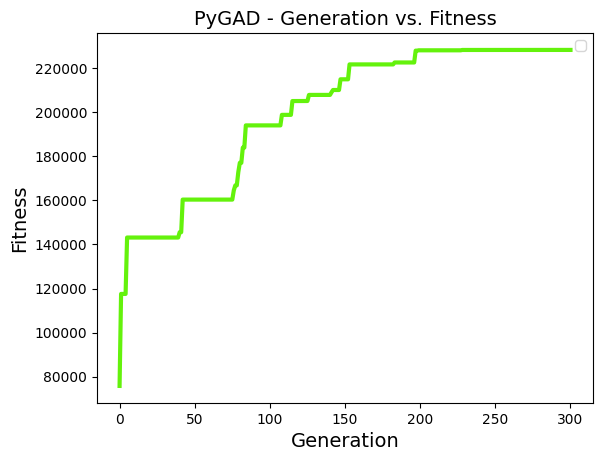

228210.8643920237
       Symbol    Price NumberShares  Expected Return      Risk
0  BAJFINANCE  5451.90           90         0.274964  0.491936
1  ULTRACEMCO  6278.95           80         0.185083  0.085346
2   POWERGRID   220.05           20         0.068145  0.012271
3        NTPC   102.45           10         0.023461  0.029169


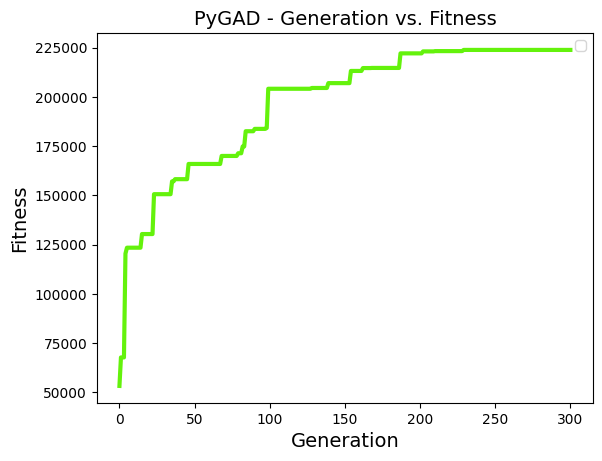

223846.75435264886
       Symbol    Price NumberShares  Expected Return      Risk
0  BAJFINANCE  5451.90           90         0.274964  0.491936
1  ULTRACEMCO  6278.95           70         0.185083  0.085346
2    HDFCBANK  1412.30           40         0.118272  0.084819
3   POWERGRID   220.05           60         0.068145  0.012271


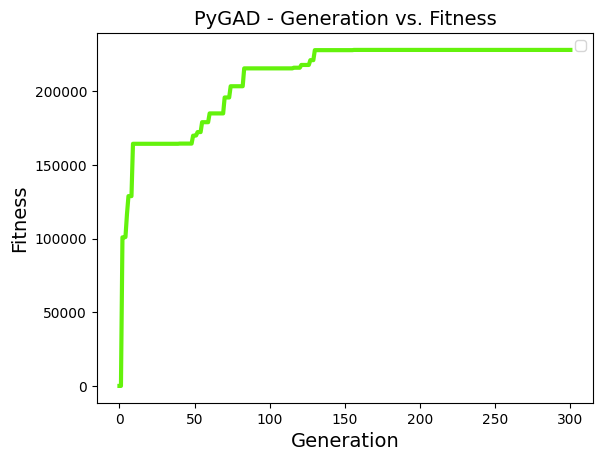

228036.8762570154
       Symbol    Price NumberShares  Expected Return      Risk
0  BAJFINANCE  5451.90           90         0.274964  0.491936
1  ULTRACEMCO  6278.95           80         0.185083  0.085346
2   POWERGRID   220.05           10         0.068145  0.012271


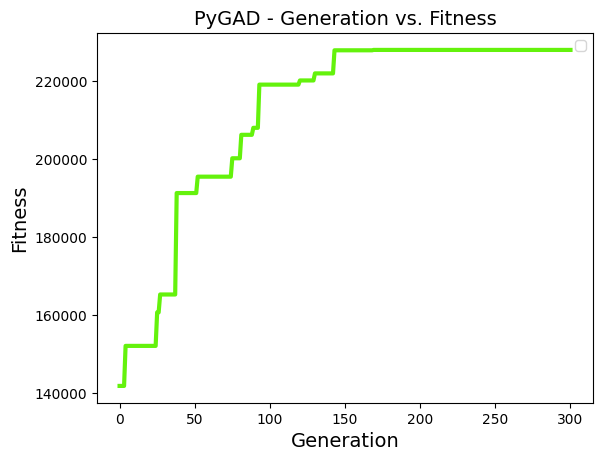

228079.17618396648
       Symbol    Price NumberShares  Expected Return      Risk
0  BAJFINANCE  5451.90           90         0.274964  0.491936
1  ULTRACEMCO  6278.95           80         0.185083  0.085346
2   POWERGRID   220.05           20         0.068145  0.012271
3         ITC   202.60           10        -0.053136  0.065926


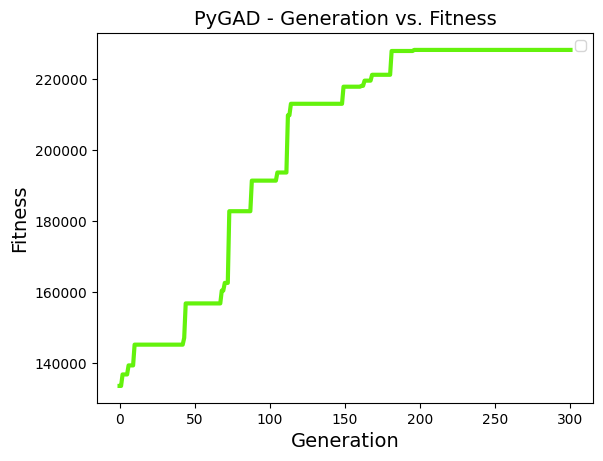

228336.78165216482
       Symbol    Price NumberShares  Expected Return      Risk
0  BAJFINANCE  5451.90           90         0.274964  0.491936
1  ULTRACEMCO  6278.95           80         0.185083  0.085346
2   POWERGRID   220.05           30         0.068145  0.012271
The best fitness:  [228336.78165216482, 228186.82895459008, 228336.78165216482, 227929.2234863918, 227910.95899687428, 228210.8643920237, 223846.75435264886, 228036.8762570154, 228079.17618396648, 228336.78165216482]


In [ ]:
# Small problem with final parameter setting
num_gen = 300
num_pop = 500
x_rate = 0.7
high_bound = 20
elite_rate = 0.3
mutation_rate = 0.1
pselect_type = "rank"
x_type = "two_points"
k_tour = 16
best_fitness = main('S', 10, num_gen, num_pop, x_rate, high_bound, elite_rate, mutation_rate, pselect_type, x_type, k_tour)
print("The best fitness: ", best_fitness)

### Test params

Small Problem with 12 considered symbols


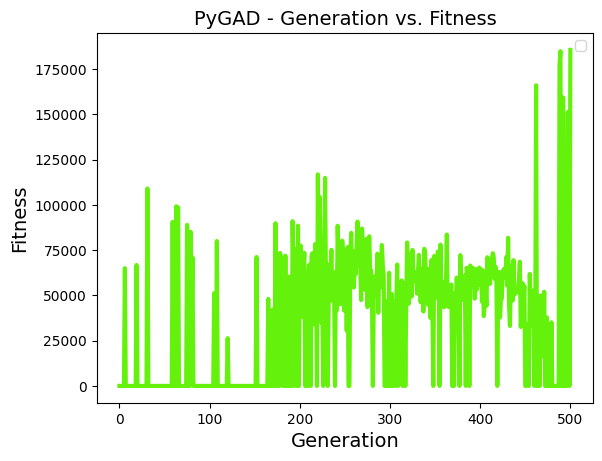

The best fitness:  [185531.0959901483]


In [ ]:
# Small problem with high bound = 30 (increase possible outcome -> not suitable for learning)
num_gen = 500
num_pop = 1000
x_rate = 0.9
high_bound = 30
elite_rate = 0
mutation_rate = 0.05
pselect_type = "tournament"
x_type = "uniform"
k_tour = 4
best_fitness = main('S', 1, num_gen, num_pop, x_rate, high_bound, elite_rate, mutation_rate, pselect_type, x_type, k_tour)
print("The best fitness: ", best_fitness)

Small Problem with 12 considered symbols


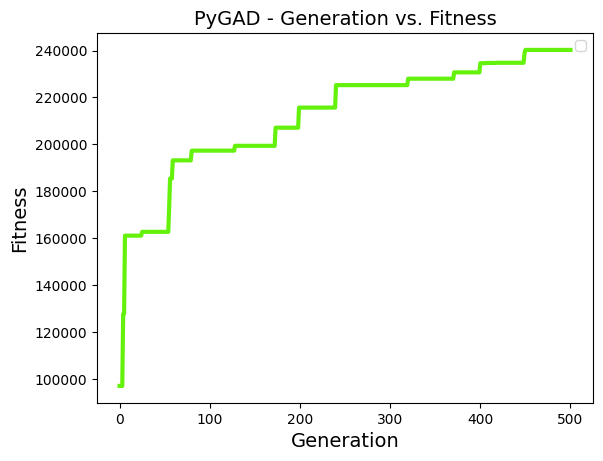

The best fitness:  [240283.7444231619]


In [ ]:
# Small problem with two points crossover (two-points xover make less fitness)
num_gen = 500
num_pop = 1000
x_rate = 0.9
high_bound = 20
elite_rate = 0.1
mutation_rate = 0.05
pselect_type = "tournament"
x_type = "uniform"
k_tour = 4
best_fitness = main('S', 1, num_gen, num_pop, x_rate, high_bound, elite_rate, mutation_rate, pselect_type, x_type, k_tour)
print("The best fitness: ", best_fitness)

Small Problem with 12 considered symbols


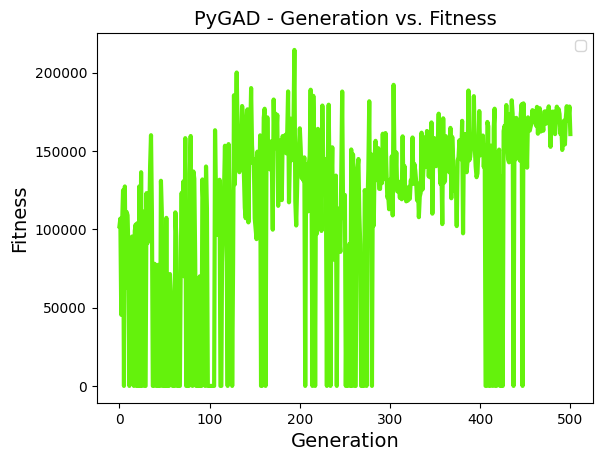

The best fitness:  [160785.5083445995]


In [ ]:
# Small problem without elitism (Elitism must need for exploitation)
num_gen = 500
num_pop = 1000
x_rate = 0.9
high_bound = 20
elite_rate = 0
mutation_rate = 0.05
pselect_type = "tournament"
x_type = "uniform"
k_tour = 4
best_fitness = main('S', 1, num_gen, num_pop, x_rate, high_bound, elite_rate, mutation_rate, pselect_type, x_type, k_tour)
print("The best fitness: ", best_fitness)

Small Problem with 12 considered symbols


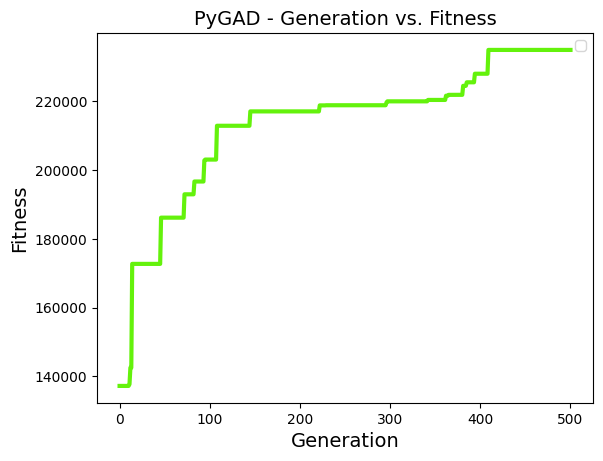

The best fitness:  [234954.18539346984]


In [ ]:
# Small problem with k_tour = 8 (little different)
num_gen = 500
num_pop = 1000
x_rate = 0.9
high_bound = 20
elite_rate = 0.1
mutation_rate = 0.05
pselect_type = "tournament"
x_type = "uniform"
k_tour = 8
best_fitness = main('S', 1, num_gen, num_pop, x_rate, high_bound, elite_rate, mutation_rate, pselect_type, x_type, k_tour)
print("The best fitness: ", best_fitness)

In [ ]:
# Small problem with ranking selection (little different)
num_gen = 500
num_pop = 1000
x_rate = 0.9
high_bound = 20
elite_rate = 0.1
mutation_rate = 0.05
pselect_type = "rank"
x_type = "uniform"
k_tour = 4
best_fitness = main('S', 1, num_gen, num_pop, x_rate, high_bound, elite_rate, mutation_rate, pselect_type, x_type, k_tour)
print("The best fitness: ", best_fitness)

## Large problem

Large Problem with 24 considered symbols


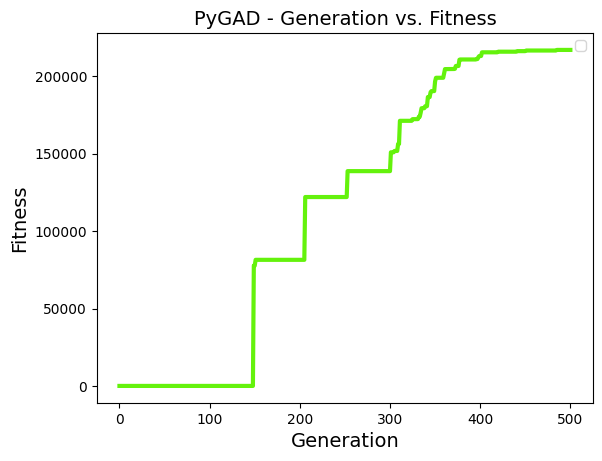

217097.4262805878
       Symbol    Price NumberShares  Expected Return      Risk
0  BAJFINANCE  5451.90           60         0.274964  0.491936
1  ULTRACEMCO  6278.95           50         0.185083  0.085346
2  BHARTIARTL   536.75           10         0.150523  0.344364
3   KOTAKBANK  1748.80          110         0.215563  0.381262
4  BAJAJ-AUTO  3833.75           40         0.174575  0.159068


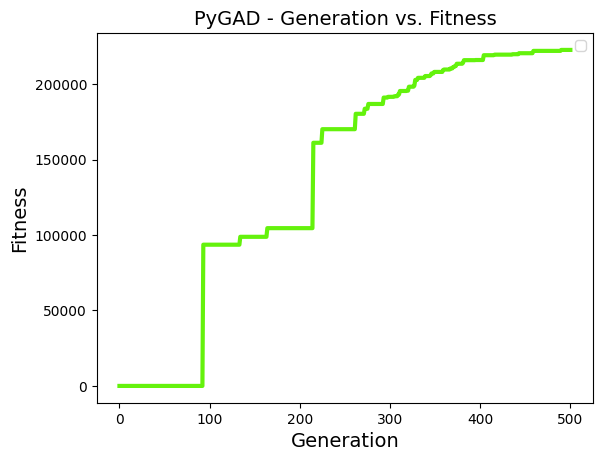

222710.28600736367
       Symbol    Price NumberShares  Expected Return      Risk
0  BAJFINANCE  5451.90           70         0.274964  0.491936
1  ULTRACEMCO  6278.95           60         0.185083  0.085346
2   COALINDIA   133.05           10        -0.055657  0.013253
3  BHARTIARTL   536.75           10         0.150523  0.344364
4   KOTAKBANK  1748.80           90         0.215563  0.381262
5  BAJAJ-AUTO  3833.75           20         0.174575  0.159068


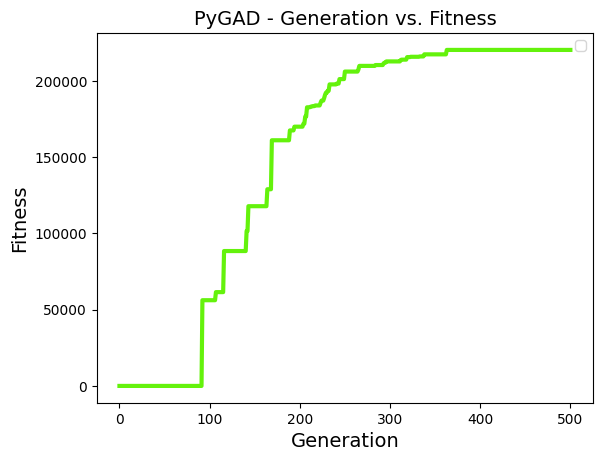

220353.89116814383
       Symbol    Price NumberShares  Expected Return      Risk
0  BAJFINANCE  5451.90           70         0.274964  0.491936
1  ULTRACEMCO  6278.95           50         0.185083  0.085346
2        GAIL   137.20           80         0.080374  0.084015
3  BHARTIARTL   536.75           30         0.150523  0.344364
4   KOTAKBANK  1748.80           90         0.215563  0.381262
5  BAJAJ-AUTO  3833.75           30         0.174575  0.159068


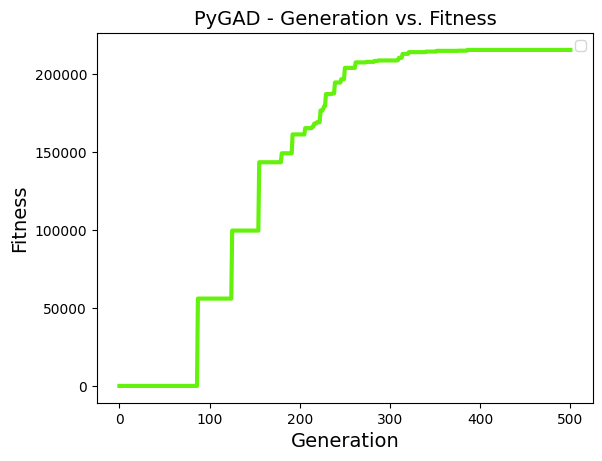

215489.3649169167
       Symbol    Price NumberShares  Expected Return      Risk
0  BAJFINANCE  5451.90           60         0.274964  0.491936
1  ULTRACEMCO  6278.95           20         0.185083  0.085346
2   POWERGRID   220.05           40         0.068145  0.012271
3   KOTAKBANK  1748.80          110         0.215563  0.381262
4  BAJAJ-AUTO  3833.75           90         0.174575  0.159068


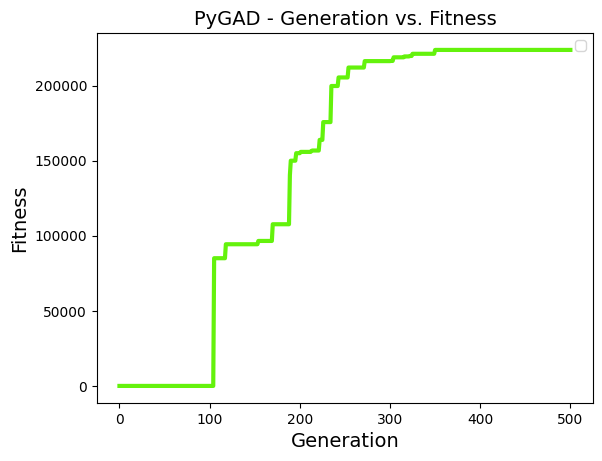

223796.5429371873
       Symbol    Price NumberShares  Expected Return      Risk
0  BAJFINANCE  5451.90           80         0.274964  0.491936
1  ULTRACEMCO  6278.95           50         0.185083  0.085346
2        NTPC   102.45           60         0.023461  0.029169
3   KOTAKBANK  1748.80           50         0.215563  0.381262
4  BAJAJ-AUTO  3833.75           40         0.174575  0.159068


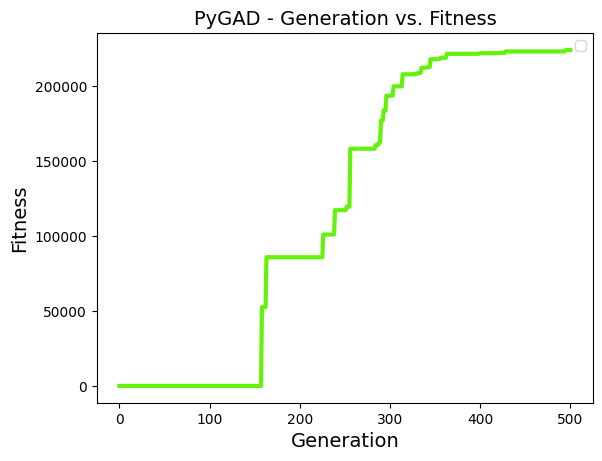

224131.84873677077
       Symbol    Price NumberShares  Expected Return      Risk
0  BAJFINANCE  5451.90           70         0.274964  0.491936
1  ULTRACEMCO  6278.95           70         0.185083  0.085346
2   POWERGRID   220.05           10         0.068145  0.012271
3   KOTAKBANK  1748.80          100         0.215563  0.381262


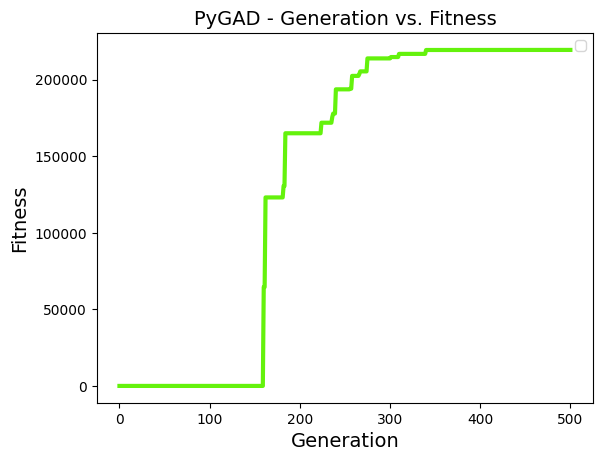

219501.78397495064
       Symbol    Price NumberShares  Expected Return      Risk
0  BAJFINANCE  5451.90           60         0.274964  0.491936
1  ULTRACEMCO  6278.95           70         0.185083  0.085346
2        NTPC   102.45           20         0.023461  0.029169
3   KOTAKBANK  1748.80          110         0.215563  0.381262
4  BAJAJ-AUTO  3833.75           10         0.174575  0.159068


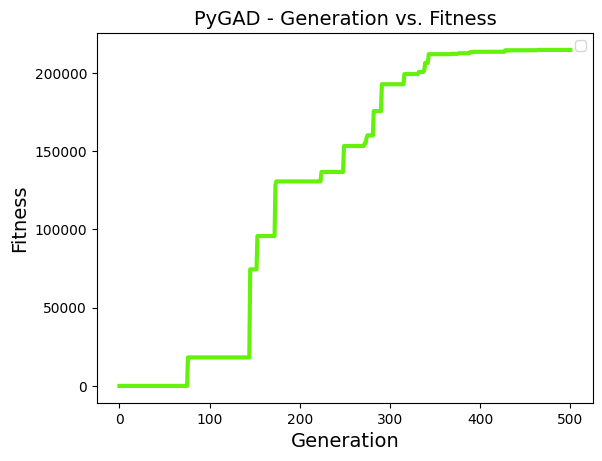

214795.2827398925
       Symbol    Price NumberShares  Expected Return      Risk
0  BAJFINANCE  5451.90           50         0.274964  0.491936
1  ULTRACEMCO  6278.95           60         0.185083  0.085346
2        GAIL   137.20           20         0.080374  0.084015
3  BHARTIARTL   536.75           10         0.150523  0.344364
4   KOTAKBANK  1748.80          130         0.215563  0.381262
5  BAJAJ-AUTO  3833.75           30         0.174575  0.159068


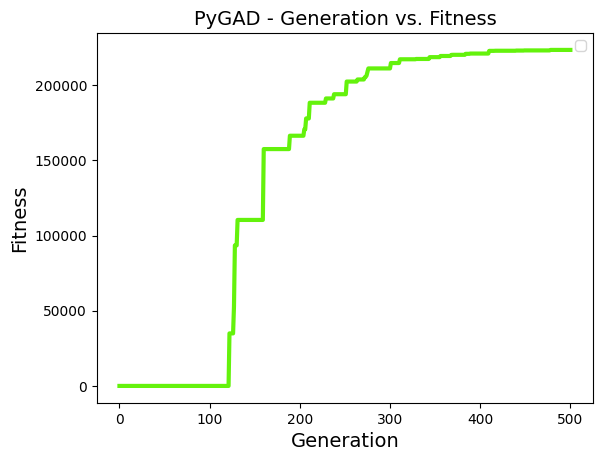

223374.53612329217
       Symbol    Price NumberShares  Expected Return      Risk
0  BAJFINANCE  5451.90           70         0.274964  0.491936
1  ULTRACEMCO  6278.95           60         0.185083  0.085346
2        GAIL   137.20           50         0.080374  0.084015
3   KOTAKBANK  1748.80          110         0.215563  0.381262
4  BAJAJ-AUTO  3833.75           10         0.174575  0.159068


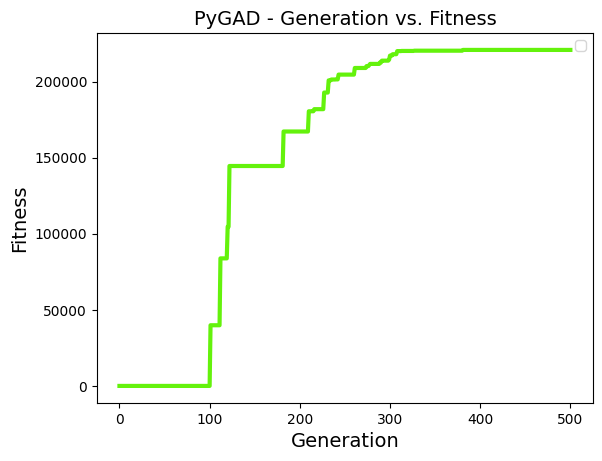

220805.6869237796
       Symbol    Price NumberShares  Expected Return      Risk
0  BAJFINANCE  5451.90           60         0.274964  0.491936
1  ULTRACEMCO  6278.95           60         0.185083  0.085346
2        NTPC   102.45           20         0.023461  0.029169
3  BHARTIARTL   536.75           20         0.150523  0.344364
4   KOTAKBANK  1748.80          140         0.215563  0.381262
5  BAJAJ-AUTO  3833.75           10         0.174575  0.159068
The best fitness:  [217097.4262805878, 222710.28600736367, 220353.89116814383, 215489.3649169167, 223796.5429371873, 224131.84873677077, 219501.78397495064, 214795.2827398925, 223374.53612329217, 220805.6869237796]


In [ ]:
# Large problem with final parameter setting
num_gen = 500
num_pop = 500
x_rate = 0.7
high_bound = 20
elite_rate = 0.4
mutation_rate = 0.1
pselect_type = "rank"
x_type = "two_points"
k_tour = 16
best_fitness = main('L', 10, num_gen, num_pop, x_rate, high_bound, elite_rate, mutation_rate, pselect_type, x_type, k_tour)
print("The best fitness: ", best_fitness)